In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import LabelEncoder

from preprocessing_functions import clean_categorical_title, mode_insert

In [2]:
allianz = pd.read_excel("Allianz2_kolone.xlsx")
allianz

,City,GeNdeR_oF_CustoMer,Age,InCoMe,ILLness
0,Dallas,Male,41.0,40367.0,No
1,Dallas,Male,54.0,45084.0,No
2,Dallas,male,42.0,52483.0,No
3,Dallas,Male,40.0,40941.0,No
4,Dallas,male,46.0,50289.0,No
...,...,...,...,...,...
149995,Austin,Male,48.0,93669.0,No
149996,Austin,Male,25.0,96748.0,No
149997,Austin,Male,26.0,111885.0,No
149998,Austin,Male,25.0,111878.0,No


In [3]:
allianz.describe()


,Age,InCoMe
count,149998.000000,149998.000000
mean,44.950126,91253.196076
std,11.572513,24989.427742
min,25.000000,-654.000000
25%,35.000000,80868.000000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


In [4]:
allianz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   City                149998 non-null  object 
 1   GeNdeR_oF_CustoMer  149998 non-null  object 
 2   Age                 149998 non-null  float64
 3   InCoMe              149998 non-null  float64
 4   ILLness             150000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 5.7+ MB


In [5]:
allianz.isna().sum()

City                  2
GeNdeR_oF_CustoMer    2
Age                   2
InCoMe                2
ILLness               0
dtype: int64

(array([2.2000e+01, 4.7100e+02, 3.0320e+03, 7.4670e+03, 7.5650e+03,
        6.3400e+03, 1.5527e+04, 3.6554e+04, 3.9522e+04, 1.7647e+04,
        6.0240e+03, 5.7530e+03, 3.3860e+03, 6.4800e+02, 4.0000e+01]),
 array([  -654.        ,  11200.06666667,  23054.13333333,  34908.2       ,
         46762.26666667,  58616.33333333,  70470.4       ,  82324.46666667,
         94178.53333333, 106032.6       , 117886.66666667, 129740.73333333,
        141594.8       , 153448.86666667, 165302.93333333, 177157.        ]),
 <BarContainer object of 15 artists>)

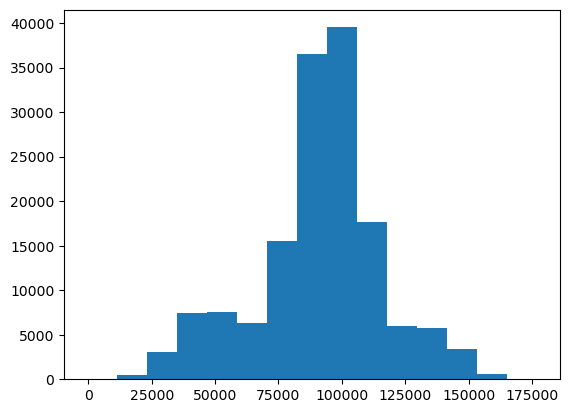

In [6]:
plt.hist (allianz.InCoMe, bins = 15)

In [7]:
allianz.sort_values (by = ["InCoMe"])

,City,GeNdeR_oF_CustoMer,Age,InCoMe,ILLness
245,Dallas,Female,40.0,-654.0,Yes
7896,Dallas,Female,34.0,584.0,No
18484,Dallas,Female,43.0,2474.0,No
9298,Dallas,Female,31.0,2667.0,Yes
17135,Dallas,Female,39.0,3842.0,No
...,...,...,...,...,...
109060,Mountain View,Male,61.0,173991.0,No
105281,Mountain View,Male,41.0,176746.0,No
109350,Mountain View,Male,58.0,177157.0,No
116,Dallas,Male,48.0,NaN,Yes


In [8]:
allianz["InCoMe"].replace({-654.0: 6540.0}, inplace=True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_20920\3974166457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  allianz["InCoMe"].replace({-654.0: 6540.0}, inplace=True)


In [9]:
allianz.describe()

,Age,InCoMe
count,149998.000000,149998.000000
mean,44.950126,91253.244037
std,11.572513,24989.258252
min,25.000000,584.000000
25%,35.000000,80868.000000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


In [10]:
allianz.duplicated().sum()

np.int64(668)

In [11]:
allianz.drop_duplicates(inplace=True)

In [12]:
allianz.describe()

,Age,InCoMe
count,149330.000000,149330.000000
mean,44.947405,91241.575986
std,11.573796,25010.768465
min,25.000000,584.000000
25%,35.000000,80834.000000
50%,45.000000,93641.500000
75%,55.000000,104527.000000
max,65.000000,177157.000000


In [13]:
isna_values = allianz[allianz.isna().any(axis=1)]
isna_values

,City,GeNdeR_oF_CustoMer,Age,InCoMe,ILLness
107,NaN,Male,47.0,30382.0,No
112,Dallas,NaN,39.0,53649.0,No
114,Dallas,Male,NaN,46788.0,Yes
116,Dallas,Male,48.0,NaN,Yes
120,NaN,NaN,NaN,NaN,Yes


In [14]:
allianz.rename(columns = {'GeNdeR_oF_CustoMer':'Gender'}, inplace = True)
allianz

,City,Gender,Age,InCoMe,ILLness
0,Dallas,Male,41.0,40367.0,No
1,Dallas,Male,54.0,45084.0,No
2,Dallas,male,42.0,52483.0,No
3,Dallas,Male,40.0,40941.0,No
4,Dallas,male,46.0,50289.0,No
...,...,...,...,...,...
149995,Austin,Male,48.0,93669.0,No
149996,Austin,Male,25.0,96748.0,No
149997,Austin,Male,26.0,111885.0,No
149998,Austin,Male,25.0,111878.0,No


In [15]:
allianz.Gender.value_counts()

Gender
Male      83389
Female    65939
male          2
Name: count, dtype: int64

In [16]:
allianz["Gender"]=allianz["Gender"].str.title()

In [17]:
allianz.Gender.value_counts()

Gender
Male      83391
Female    65939
Name: count, dtype: int64

In [18]:
label_encoder = LabelEncoder()

In [19]:
allianz['Gender_Label'] = label_encoder.fit_transform(allianz['Gender'])

In [20]:
allianz

,City,Gender,Age,InCoMe,ILLness,Gender_Label
0,Dallas,Male,41.0,40367.0,No,1
1,Dallas,Male,54.0,45084.0,No,1
2,Dallas,Male,42.0,52483.0,No,1
3,Dallas,Male,40.0,40941.0,No,1
4,Dallas,Male,46.0,50289.0,No,1
...,...,...,...,...,...,...
149995,Austin,Male,48.0,93669.0,No,1
149996,Austin,Male,25.0,96748.0,No,1
149997,Austin,Male,26.0,111885.0,No,1
149998,Austin,Male,25.0,111878.0,No,1


In [21]:
allianz2 = allianz.copy()

In [22]:
allianz2["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [24]:
allianz2["Gender"].fillna(value = "Male", inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_20920\2878801487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  allianz2["Gender"].fillna(value = "Male", inplace = True)


In [25]:
allianz2["Age"].mode() ##popis["Age"].mean() popis["Age"].fillna(value=44.95,inplace=True)

0    26.0
Name: Age, dtype: float64

In [26]:
allianz2["Age"].fillna(value = 26, inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_20920\4186544539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  allianz2["Age"].fillna(value = 26, inplace = True)


In [27]:
allianz2.isna().sum()

City            2
Gender          0
Age             0
InCoMe          2
ILLness         0
Gender_Label    0
dtype: int64